In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
X = digits["data"]

print(X.shape)
X

(1797, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

### Visualize

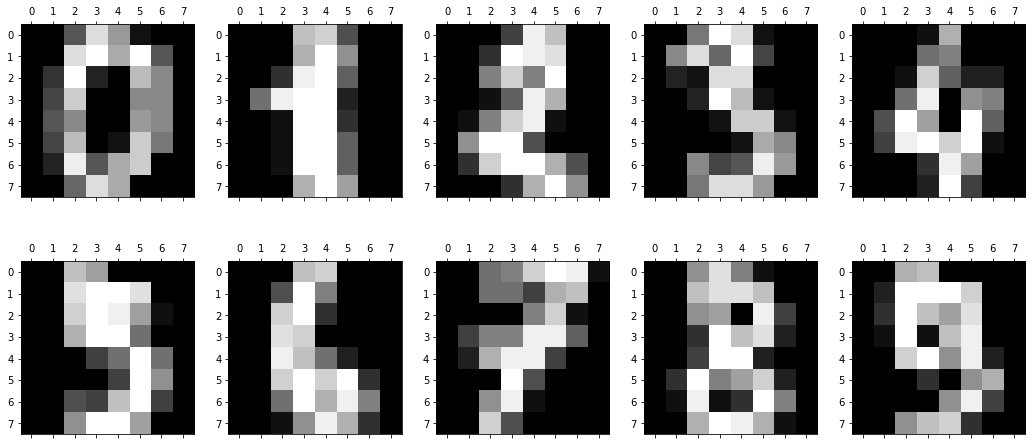

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()

figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(18, 8)

axes[0][0].matshow(X[0].reshape(8, 8))
axes[0][1].matshow(X[1].reshape(8, 8))
axes[0][2].matshow(X[2].reshape(8, 8))
axes[0][3].matshow(X[3].reshape(8, 8))
axes[0][4].matshow(X[4].reshape(8, 8))
axes[1][0].matshow(X[5].reshape(8, 8))
axes[1][1].matshow(X[6].reshape(8, 8))
axes[1][2].matshow(X[7].reshape(8, 8))
axes[1][3].matshow(X[8].reshape(8, 8))
axes[1][4].matshow(X[9].reshape(8, 8))

In [5]:
y = digits["target"]

print(y.shape)
y

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

## Preprocessing

In [6]:
X_mean = X.mean()

X = X - X_mean

X.mean(), X.min(), X.max()

(8.995463126623417e-17, -4.884164579855314, 11.115835420144686)

In [20]:
from keras.utils import to_categorical

y_hot = to_categorical(y)

print(y.shape, y_hot.shape)

(1797,) (1797, 10)


## Define Activation

### Sigmoid

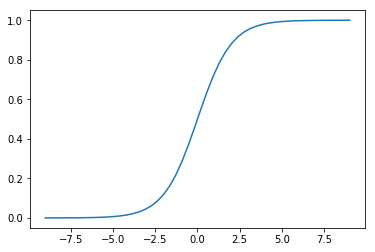

In [21]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid(xx)

plt.plot(xx, yy)

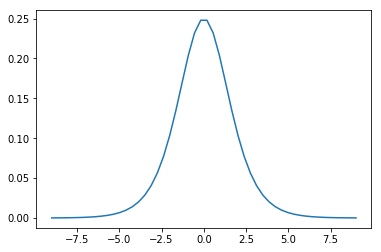

In [22]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

## Define Cross Entropy

In [79]:
def cross_entropy(actual, predict, eps=1e-15):
    actual = np.array(actual)
    predict = np.array(predict)

    clipped_predict = np.minimum(np.maximum(predict, eps), 1 - eps)
    
    loss = actual * np.log(clipped_predict) + (1 - actual) * np.log(1 - clipped_predict)
   
   
    return -1.0 * loss.mean()

## Build a Model

In [80]:
from time import time

def train(X, y, num_epoch, learning_rate, update_method):
    history = []

    start = time()

    w1 = np.random.uniform(low=-np.sqrt(6 / (64+100)),
                           high=+np.sqrt(6 / (64+100)),
                           size=(64, 100))

    w2 = np.random.uniform(low=-np.sqrt(6 / (100+10)),
                           high=+np.sqrt(6 / (100+10)),
                           size=(100, 10))

    for epoch in range(num_epoch):
        # Forward Propagation
        z1 = X.dot(w1)
        a1 = sigmoid(z1)
        z2 = a1.dot(w2)
        a2 = sigmoid(z2)

        y_predict = np.argmax(a2, axis=1)

        accuracy = (y_predict == y).mean()
        loss = cross_entropy(y_hot, a2)

        if epoch % (num_epoch // 10) == 0:
            print("{0:3} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))

        history.append({
            'epoch': epoch,
            'elapsed': time() - start,
            'accuracy': accuracy,
            'loss': loss,
        })

        # Backpropagation
        d2 = (a2 - y_hot)
        d1 = d2.dot(w2.T) * sigmoid_derivative(z1)

        # Weight gradients
        dw2 = a1.T.dot(d2)
        dw1 = X.T.dot(d1)

        w1, w2 = update_method(epoch, learning_rate, w1, w2, dw1, dw2)

    print("----" * 10)
    print("{0:3} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))
    
    history = pd.DataFrame(history)
    history = history[["epoch", "elapsed", "accuracy", "loss"]]

    return history

### Stochastic Gradient Descent

In [81]:
# Write your code here!
def update_sgd(epoch,learning_rate,w1,w2,dw1,dw2):
    w2 = w2-learning_rate *dw2
    w1 = w1-learning_rate *dw1
    
    return w1, w2

num_epoch = 100
learning_rate = 0.0001

history_sgd = train(X,y,num_epoch, learning_rate, update_method = update_sgd)
history_sgd.head(10)

  0 accuracy = 0.14190, loss = 0.83615
 10 accuracy = 0.82304, loss = 0.20956
 20 accuracy = 0.89594, loss = 0.15656
 30 accuracy = 0.92821, loss = 0.12558
 40 accuracy = 0.94101, loss = 0.10492
 50 accuracy = 0.94825, loss = 0.09017
 60 accuracy = 0.95771, loss = 0.07912
 70 accuracy = 0.96327, loss = 0.07057
 80 accuracy = 0.96717, loss = 0.06376
 90 accuracy = 0.97106, loss = 0.05822
----------------------------------------
 99 accuracy = 0.97218, loss = 0.05404


,epoch,elapsed,accuracy,loss
0,0,0.015624,0.141903,0.836153
1,1,0.062496,0.150807,0.344692
2,2,0.109368,0.273233,0.306650
3,3,0.140615,0.455203,0.284114
4,4,0.187487,0.609349,0.268435
5,5,0.234360,0.686700,0.255685
6,6,0.281231,0.730106,0.244526
7,7,0.345909,0.766277,0.234509
8,8,0.396913,0.789649,0.225421
9,9,0.459411,0.809126,0.217138


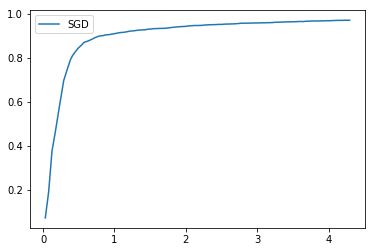

In [26]:
plt.plot(history_sgd['elapsed'],history_sgd['accuracy'],label='SGD')
plt.legend()

### Momentum

In [39]:
# Write your code here!
mu = 0.9 # 보통
cache_dw1,cache_dw2 =0,0
def update_momentum(epoch,learning_rate,w1,w2,dw1,dw2):
    global cache_dw1, cache_dw2
    
    cache_dw2 = mu* cache_dw2 - learning_rate*dw2
    w2 = w2 + cache_dw2
    
    cache_dw1 = mu*cache_dw1 - learning_rate*dw1
    w1 = w1 + cache_dw1
    
    return w1,w2

num_epoch = 100
learning_rate = 0.0001

history_momentum = train(X,y,num_epoch, learning_rate, update_method = update_momentum)
history_momentum.head(10)

[[1.e+00 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e+00 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e-15 1.e+00 ... 1.e-15 1.e-15 1.e-15]
 ...
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e+00]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]]
  0 accuracy = 0.08403, loss = inf
[[1.e+00 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e+00 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e-15 1.e+00 ... 1.e-15 1.e-15 1.e-15]
 ...
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e+00]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]]
[[1.e+00 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e+00 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e-15 1.e+00 ... 1.e-15 1.e-15 1.e-15]
 ...
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e+00]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]]
[[1.e+00 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e+00 

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


[[1.e+00 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e+00 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e-15 1.e+00 ... 1.e-15 1.e-15 1.e-15]
 ...
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e+00]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]]
[[1.e+00 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e+00 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e-15 1.e+00 ... 1.e-15 1.e-15 1.e-15]
 ...
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e+00]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]]
[[1.e+00 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e+00 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e-15 1.e+00 ... 1.e-15 1.e-15 1.e-15]
 ...
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e+00]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]]
[[1.e+00 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e+00 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [

[[1.e+00 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e+00 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e-15 1.e+00 ... 1.e-15 1.e-15 1.e-15]
 ...
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e+00]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]]
[[1.e+00 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e+00 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e-15 1.e+00 ... 1.e-15 1.e-15 1.e-15]
 ...
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e+00]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]]
[[1.e+00 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e+00 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e-15 1.e+00 ... 1.e-15 1.e-15 1.e-15]
 ...
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e+00]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]]
[[1.e+00 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e+00 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [

[[1.e+00 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e+00 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e-15 1.e+00 ... 1.e-15 1.e-15 1.e-15]
 ...
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e+00]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]]
[[1.e+00 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e+00 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e-15 1.e+00 ... 1.e-15 1.e-15 1.e-15]
 ...
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e+00]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]]
[[1.e+00 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e+00 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e-15 1.e+00 ... 1.e-15 1.e-15 1.e-15]
 ...
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e+00]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]]
[[1.e+00 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e+00 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [

[[1.e+00 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e+00 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e-15 1.e+00 ... 1.e-15 1.e-15 1.e-15]
 ...
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e+00]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]]
[[1.e+00 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e+00 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e-15 1.e+00 ... 1.e-15 1.e-15 1.e-15]
 ...
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e+00]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]]
[[1.e+00 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e+00 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e-15 1.e+00 ... 1.e-15 1.e-15 1.e-15]
 ...
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e+00]
 [1.e-15 1.e-15 1.e-15 ... 1.e-15 1.e+00 1.e-15]]
[[1.e+00 1.e-15 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [1.e-15 1.e+00 1.e-15 ... 1.e-15 1.e-15 1.e-15]
 [

,epoch,elapsed,accuracy,loss
0,0,0.015623,0.084029,inf
1,1,0.062496,0.109071,inf
2,2,0.109367,0.175849,inf
3,3,0.156240,0.193100,inf
4,4,0.203112,0.238731,inf
5,5,0.263978,0.355036,inf
6,6,0.311832,0.461324,inf
7,7,0.374335,0.569839,inf
8,8,0.436824,0.686144,inf
9,9,0.493634,0.622148,inf


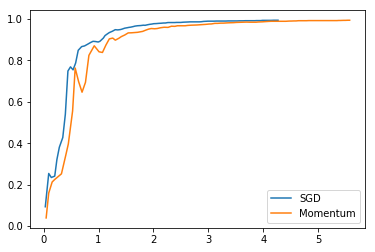

In [33]:
plt.plot(history_sgd['elapsed'],history_sgd['accuracy'],label='SGD')

plt.plot(history_momentum['elapsed'],history_momentum['accuracy'],label='Momentum')
plt.legend()

### Nesterov Momentum

In [34]:
# Write your code here!

mu = 0.9

cache_dw1 , cache_dw2 = 0,0

def update_nesterov(epoch, learning_rate,w1,w2,dw1,dw2 ):
    global cache_dw1 , cache_dw2
    
    dw2_prev = cache_dw2
    cache_dw2 = mu*cache_dw2 - learning_rate *dw2
    w2 = w2+(-mu*dw2_prev) + (1+mu) *cache_dw2
    dw1_prev = cache_dw1
    cache_dw1 = mu*cache_dw1 - learning_rate *dw1
    w1 = w1+(-mu*dw1_prev) + (1+mu) *cache_dw1
    
    return w1, w2


num_epoch = 100
learning_rate = 0.0001

history_nesterov = train(X,y,num_epoch, learning_rate, update_method = update_momentum)
history_nesterov.head(10)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


  0 accuracy = 0.15526, loss = inf
 10 accuracy = 0.71230, loss = inf
 20 accuracy = 0.92933, loss = inf
 30 accuracy = 0.96439, loss = inf
 40 accuracy = 0.97830, loss = inf
 50 accuracy = 0.98497, loss = inf
 60 accuracy = 0.98887, loss = inf
 70 accuracy = 0.99165, loss = inf
 80 accuracy = 0.99388, loss = inf
 90 accuracy = 0.99555, loss = inf
----------------------------------------
 99 accuracy = 0.99722, loss = inf


,epoch,elapsed,accuracy,loss
0,0,0.015624,0.155259,inf
1,1,0.062496,0.271007,inf
2,2,0.109366,0.242070,inf
3,3,0.171863,0.269894,inf
4,4,0.203110,0.368392,inf
5,5,0.256209,0.418475,inf
6,6,0.309199,0.526433,inf
7,7,0.340444,0.702282,inf
8,8,0.387317,0.830273,inf
9,9,0.418568,0.736227,inf


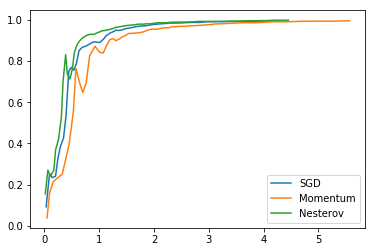

In [35]:
plt.plot(history_sgd['elapsed'],history_sgd['accuracy'],label='SGD')
plt.plot(history_momentum['elapsed'],history_momentum['accuracy'],label='Momentum')
plt.plot(history_nesterov['elapsed'],history_nesterov['accuracy'],label='Nesterov')
plt.legend()

### AdaGrad

In [57]:
# Write your code here!
cache_dw1,cache_dw2 = 0,0
def update_adagrad(epoch,learning_rate, w1,w2,dw1,dw2):
    global cache_dw1, cache_dw2
    cache_dw2 = cache_dw2 + dw2 **2
    w2 = w2-learning_rate *dw2/np.sqrt(cache_dw2+0.00000000001)
    cache_dw1 = cache_dw1 + dw1 **2
    w1 = w1-learning_rate *dw1/np.sqrt(cache_dw1+0.00000000001)
    return w1, w2
    
# momentum 보다. learning_rate 올려주는게 좋다.
num_epoch = 100
learning_rate = 0.01

history_adagrad = train(X,y,num_epoch, learning_rate, update_method = update_adagrad)
history_adagrad.head(10)


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


-inf
  0 accuracy = 0.08514, loss = inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
 10 accuracy = 0.81970, loss = inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
 20 accuracy = 0.89427, loss = inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
 30 accuracy = 0.91653, loss = inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
 40 accuracy = 0.93044, loss = inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
 50 accuracy = 0.93823, loss = inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
 60 accuracy = 0.94880, loss = inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
 70 accuracy = 0.95381, loss = inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
 80 accuracy = 0.95938, loss = inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
 90 accuracy = 0.96160, loss = inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
----------------------------------------
 99 accuracy = 0.96550, loss = inf


,epoch,elapsed,accuracy,loss
0,0,0.015624,0.085142,inf
1,1,0.062496,0.153033,inf
2,2,0.093745,0.286589,inf
3,3,0.140615,0.456873,inf
4,4,0.187487,0.548692,inf
5,5,0.218736,0.622705,inf
6,6,0.265607,0.682248,inf
7,7,0.312479,0.734558,inf
8,8,0.343727,0.775181,inf
9,9,0.409181,0.803005,inf


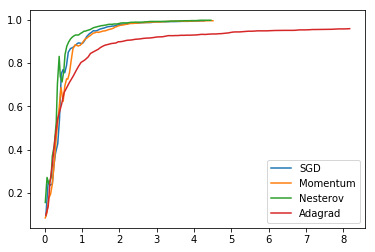

In [48]:
plt.plot(history_sgd['elapsed'],history_sgd['accuracy'],label='SGD')
plt.plot(history_momentum['elapsed'],history_momentum['accuracy'],label='Momentum')
plt.plot(history_nesterov['elapsed'],history_nesterov['accuracy'],label='Nesterov')
plt.plot(history_adagrad['elapsed'],history_adagrad['accuracy'],label='Adagrad')
plt.legend()

### RMSProp

In [52]:
# Write your code here!
decay = 0.995

# Write your code here!
cache_dw1,cache_dw2 = 0,0
def update_rmsprop(epoch,learning_rate, w1,w2,dw1,dw2):
    global cache_dw1, cache_dw2
    cache_dw2 = decay*cache_dw2 + (1-decay)*dw2 **2
    w2 = w2-learning_rate *dw2/np.sqrt(cache_dw2+0.00000000001)
    cache_dw1 = decay*cache_dw1 + (1-decay)*dw1 **2
    w1 = w1-learning_rate *dw1/np.sqrt(cache_dw1+0.00000000001)
    return w1, w2
    
# momentum 보다. learning_rate 올려주는게 좋다.
num_epoch = 100
learning_rate = 0.01

history_rmsprop = train(X,y,num_epoch, learning_rate, update_method = update_rmsprop)
history_rmsprop.head(10)



  0 accuracy = 0.12743, loss = inf


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


 10 accuracy = 0.56761, loss = inf
 20 accuracy = 0.88592, loss = inf
 30 accuracy = 0.92042, loss = inf
 40 accuracy = 0.94046, loss = inf
 50 accuracy = 0.97106, loss = inf
 60 accuracy = 0.97718, loss = inf
 70 accuracy = 0.97885, loss = inf
 80 accuracy = 0.97774, loss = inf
 90 accuracy = 0.98553, loss = inf
----------------------------------------
 99 accuracy = 0.98664, loss = inf


,epoch,elapsed,accuracy,loss
0,0,0.023997,0.127435,inf
1,1,0.075984,0.101280,inf
2,2,0.121247,0.101280,inf
3,3,0.180684,0.099610,inf
4,4,0.227556,0.285476,inf
5,5,0.283738,0.219811,inf
6,6,0.336760,0.412910,inf
7,7,0.383632,0.539789,inf
8,8,0.446129,0.596550,inf
9,9,0.477378,0.638843,inf


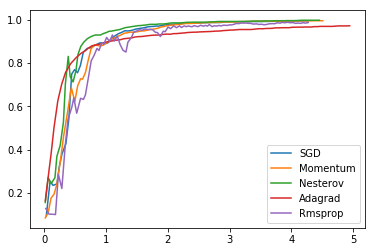

In [53]:
plt.plot(history_sgd['elapsed'],history_sgd['accuracy'],label='SGD')
plt.plot(history_momentum['elapsed'],history_momentum['accuracy'],label='Momentum')
plt.plot(history_nesterov['elapsed'],history_nesterov['accuracy'],label='Nesterov')
plt.plot(history_adagrad['elapsed'],history_adagrad['accuracy'],label='Adagrad')
plt.plot(history_rmsprop['elapsed'],history_rmsprop['accuracy'],label='Rmsprop')
plt.legend()

### Adam

In [59]:
# Write your code here!
beta1 = 0.9
beta2 = 0.99
dw1m, dw2m = 0,0
dw1v, dw2v = 0,0
eps = 0.000000000001
def update_adam(epoch,learning_rate,w1,w2,dw1,dw2):
    global dw1m, dw2m
    global dw1v,dw2v

    dw2m = beta1 * dw2m + (1-beta1) *dw2
    dw2v = beta2 * dw2v + (1-beta2)*(dw2**2)
    dw2mb = dw2m/(1-beta1**(1+epoch)) # warm start or bias collection
    dw2vb = dw2v/(1-beta2**(1+epoch))
    w2 = w2- learning_rate * dw2mb / np.sqrt(dw2vb+eps)
    dw1m = beta1 * dw1m + (1-beta1) *dw1
    dw1v = beta2 * dw1v + (1-beta2)*(dw1**2)
    dw1mb = dw1m/(1-beta1**(1+epoch)) # warm start or bias collection
    dw1vb = dw1v/(1-beta2**(1+epoch))
    w1 = w1- learning_rate * dw1mb / np.sqrt(dw1vb+eps)
    
    return w1, w2

num_epoch = 100
learning_rate = 0.01

history_adam = train(X,y,num_epoch, learning_rate, update_method = update_adam)
history_adam.head(10)


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


-inf
  0 accuracy = 0.10573, loss = inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
 10 accuracy = 0.65832, loss = inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
 20 accuracy = 0.87924, loss = inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
 30 accuracy = 0.92432, loss = inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
 40 accuracy = 0.94658, loss = inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
 50 accuracy = 0.96494, loss = inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
 60 accuracy = 0.97607, loss = inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
 70 accuracy = 0.98331, loss = inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
 80 accuracy = 0.98664, loss = inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
 90 accuracy = 0.98776, loss = inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
----------------------------------------
 99 accuracy = 0.98943, loss = inf


,epoch,elapsed,accuracy,loss
0,0,0.031249,0.105732,inf
1,1,0.062496,0.154146,inf
2,2,0.124994,0.290484,inf
3,3,0.171865,0.475237,inf
4,4,0.218735,0.564274,inf
5,5,0.278469,0.652198,inf
6,6,0.345627,0.698943,inf
7,7,0.408120,0.710629,inf
8,8,0.454992,0.701725,inf
9,9,0.516552,0.676127,inf


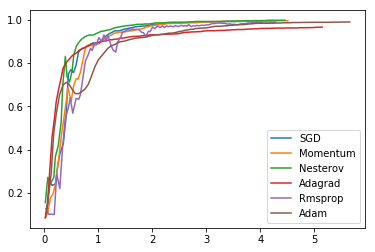

In [60]:
plt.plot(history_sgd['elapsed'],history_sgd['accuracy'],label='SGD')
plt.plot(history_momentum['elapsed'],history_momentum['accuracy'],label='Momentum')
plt.plot(history_nesterov['elapsed'],history_nesterov['accuracy'],label='Nesterov')
plt.plot(history_adagrad['elapsed'],history_adagrad['accuracy'],label='Adagrad')
plt.plot(history_rmsprop['elapsed'],history_rmsprop['accuracy'],label='Rmsprop')
plt.plot(history_adam['elapsed'],history_adam['accuracy'],label='Adam')
plt.legend()